In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

In [2]:
json_path="./eval_output.json"
with open(json_path) as f:
    data = json.load(f)

In [3]:
naive = []
prediction = []

for d in data["datapoints"]:
    avg_time = np.asarray(list(map(lambda x: x["computationTime"],
                   d["data"]["workers"])))
    avg_time = np.average(avg_time)
    if d["balancer"] == "predictionRecursive":
        prediction.append(avg_time)
    else:
        naive.append(avg_time)

# time in ms
naive = np.asarray(naive) / 1000
prediction = np.asarray(prediction) / 1000
print(naive, prediction)

[ 713.149       489.66708333  305.08366667 6494.27925     840.51376923
 1637.01375     575.80308333  648.3165    ] [ 603.93025714  347.30688235  179.18327027 4438.029       602.9807027
 1203.56438889  624.52348276  642.70285714]


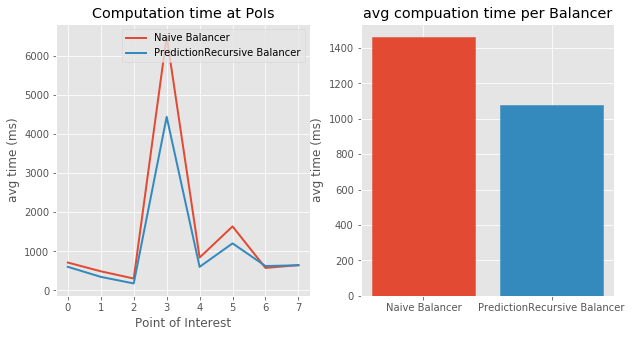

In [8]:
# Data for plotting
x = np.arange(len(naive))
names = ["Naive Balancer", "PredictionRecursive Balancer"]

plt.style.use('ggplot')
fig, (line, bar) = plt.subplots(1, 2, figsize=(10,5))
p0 = line.plot(x, naive, label=names[0], lw=2)
p1 = line.plot(x, prediction, label=names[1], lw=2)
line.legend()

line.set(xlabel='Point of Interest', ylabel='avg time (ms)',
       title='Computation time at PoIs')
line.grid(True)

avg = np.asarray([np.average(naive), np.average(prediction)])
x_avg = np.arange(len(avg))

barlist = bar.bar(x_avg, avg)
# set colors of bars to match colors in line plot
barlist[0].set_color(p0[0].get_color())
barlist[1].set_color(p1[0].get_color())

bar.set_xticks(x_avg)
bar.set_xticklabels(names)
bar.set(ylabel="avg time (ms)",
       title="avg compuation time per Balancer")
bar.grid(True)

fig.savefig("compuationTime.svg", format="svg")
plt.show()